In [3]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#read the dataset from csv file
train = pd.read_csv('C:/Users/HP/Desktop/train.csv')
test = pd.read_csv('C:/Users/HP/Desktop/test.csv')

In [5]:
#displaying the bottom 5 rows of data
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#gives the structure of the dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#check how many null values are present in each column
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

EXPLORATORY DATA ANALYSIS

<AxesSubplot: xlabel='Survived', ylabel='count'>

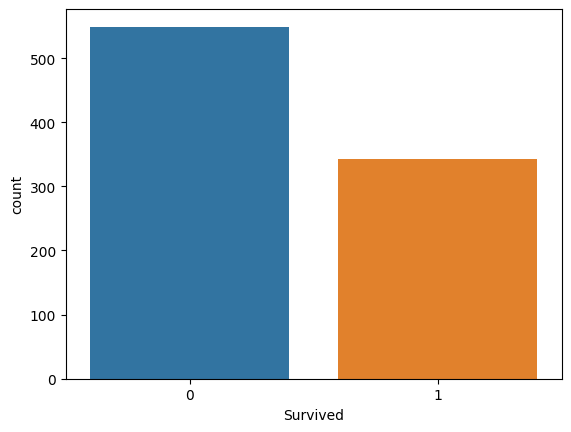

In [9]:
sns.countplot(x = 'Survived', data = train)

<AxesSubplot: xlabel='Pclass', ylabel='count'>

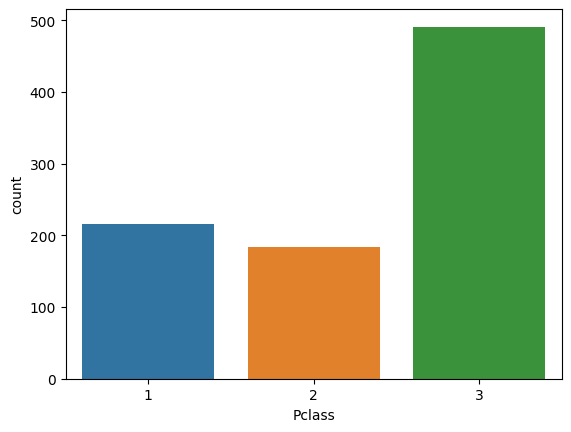

In [10]:
sns.countplot(x = 'Pclass', data = train)

<AxesSubplot: xlabel='Sex', ylabel='count'>

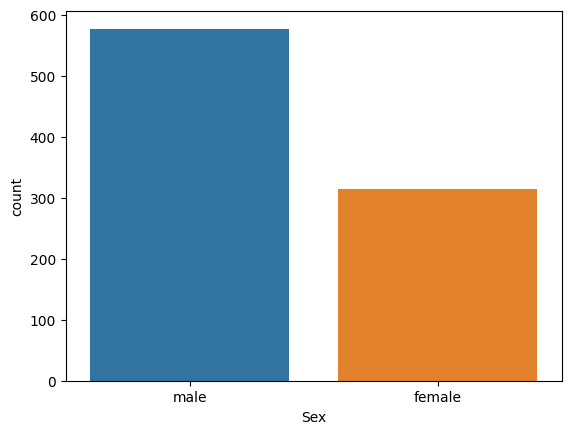

In [11]:
sns.countplot(x = 'Sex', data = train)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

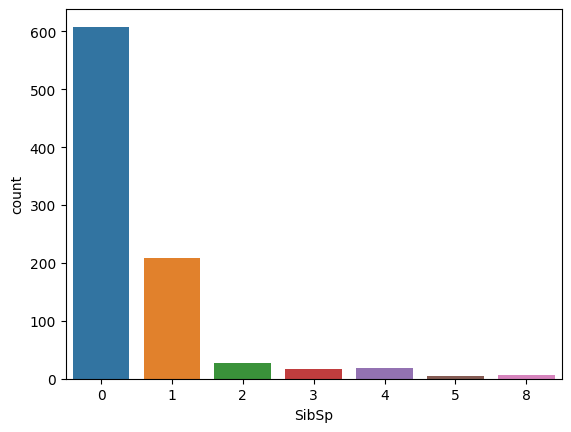

In [12]:
sns.countplot(x = 'SibSp', data = train)

#Majority of peaople were travelling without their siblings or spouse

<AxesSubplot: xlabel='Parch', ylabel='count'>

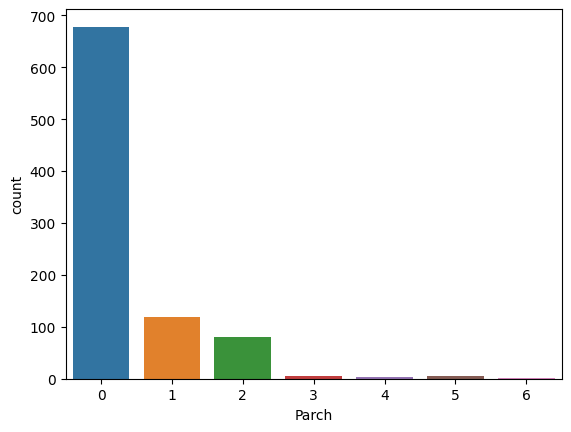

In [13]:
sns.countplot(x = 'Parch', data = train)

#Majority of peaople were travelling without parents or child

<AxesSubplot: xlabel='Embarked', ylabel='count'>

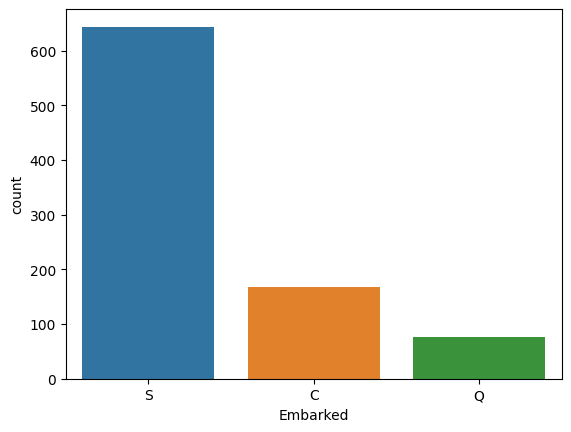

In [14]:
sns.countplot(x = 'Embarked', data = train)

#this helps us assume that City S may be the starting station of the journey
#as most of the passengers have boarded from this city.

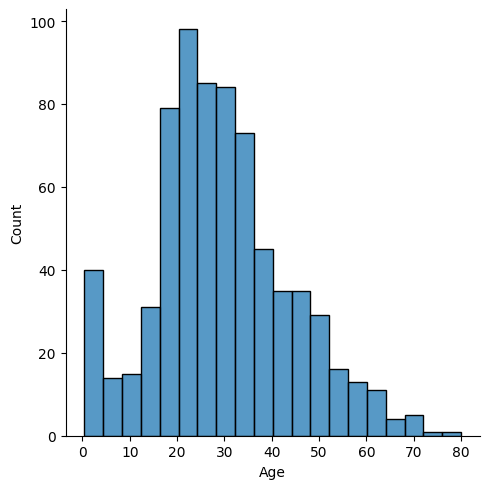

In [15]:
sns.displot(train['Age'])
#we can also use:
#sns.histplot(train['Age'])
#or 
#train['Age'].plot.hist()

#it gives us a distribution plot

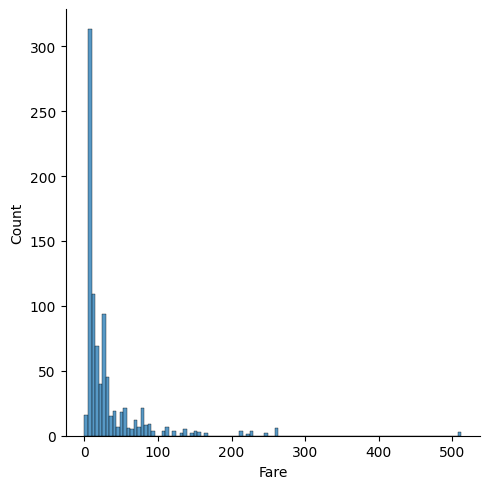

In [16]:
sns.displot(train['Fare'])

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

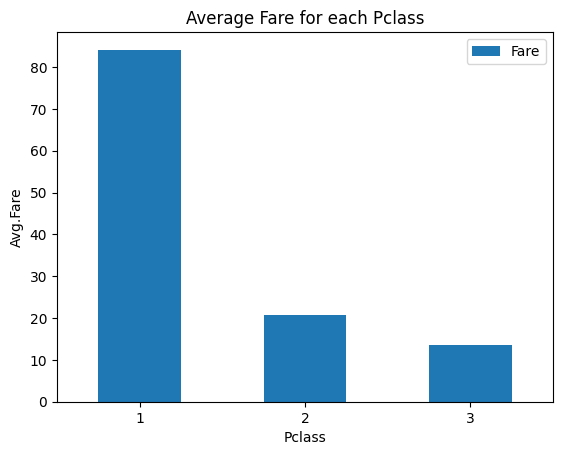

In [17]:
train.pivot_table(index='Pclass', values = 'Fare').plot(kind='bar')
#it will calculate mean for each passenger class and plot it in form of bargraph

plt.title('Average Fare for each Pclass')
plt.xlabel('Pclass')    #changing label of x-axis
plt.ylabel('Avg.Fare')  #changing label of x-axis
plt.xticks(rotation=0)

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

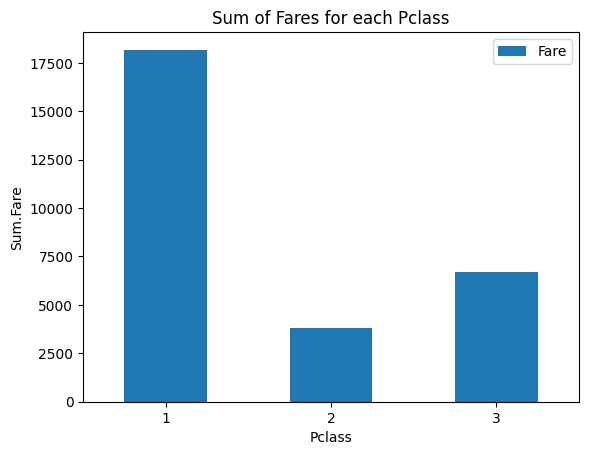

In [18]:
#when aggfunction is not provided, by default pivot_table() function will take mean of the values

train.pivot_table(index='Pclass', values = 'Fare', aggfunc=np.sum).plot(kind='bar')
#it will calculate sum of fare for each passenger class and plot it in form of bargraph

plt.title('Sum of Fares for each Pclass')
plt.xlabel('Pclass')    #changing label of x-axis
plt.ylabel('Sum.Fare')  #changing label of x-axis
plt.xticks(rotation=0)

DATA PREPROCESSING

In [19]:
titanic_len = len(train)
titanic = pd.concat([train,test],axis = 0)
titanic = titanic.reset_index(drop=True)   #to drop the index

In [20]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [21]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [22]:
#dopping the Cabin column as it is of no use.
titanic = titanic.drop(columns = 'Cabin',axis = 1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [23]:
#filling missing values using mean of that column as they are numerical columns.
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())

In [24]:
#filling missing values using mode of that column as it is categoriacal column.
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [25]:
titanic.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

Log transformation for uniform distribution

C:\Users\HP\AppData\Local\Temp\ipykernel_10836\3001370571.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Fare'])


<AxesSubplot: xlabel='Fare', ylabel='Density'>

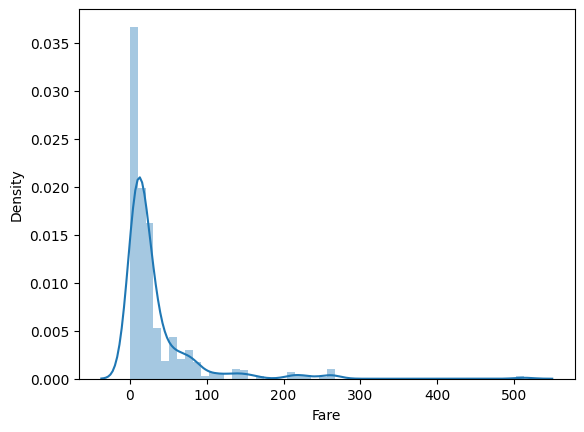

In [26]:
sns.distplot(titanic['Fare'])

In [27]:
titanic['Fare'] = np.log(titanic['Fare']+1)
#we have added +1 because in case the fare is zero or has null value it will throw error s

C:\Users\HP\AppData\Local\Temp\ipykernel_10836\3001370571.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Fare'])


<AxesSubplot: xlabel='Fare', ylabel='Density'>

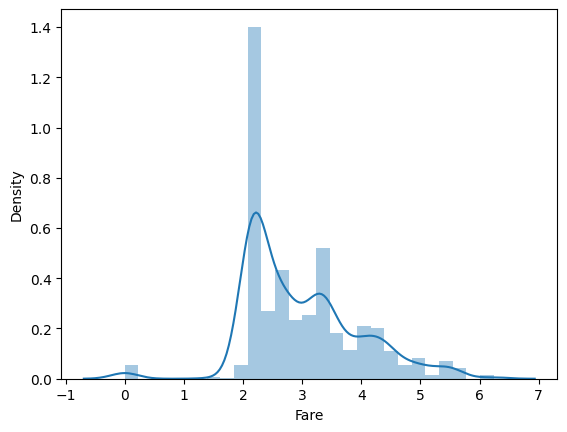

In [28]:
sns.distplot(titanic['Fare'])

Corelation Matrix

C:\Users\HP\AppData\Local\Temp\ipykernel_10836\3283234111.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(), annot = True)


<AxesSubplot: >

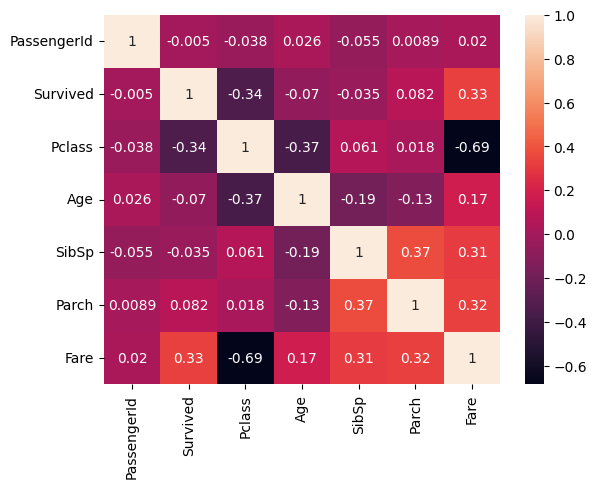

In [29]:
sns.heatmap(titanic.corr(), annot = True)

Text(0.5, 1.0, 'Fare over Pclass graph who survived')

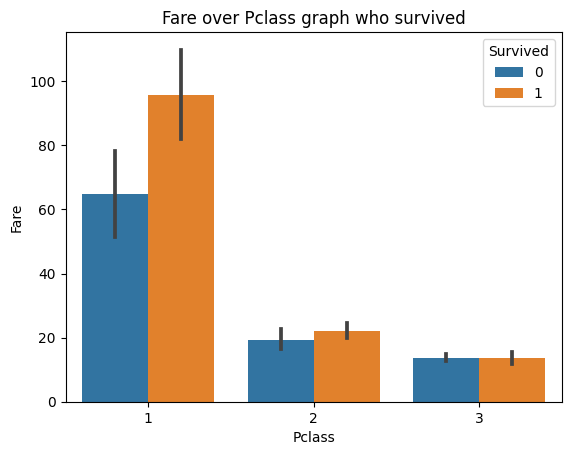

In [30]:
sns.barplot(data=train, x='Pclass',y='Fare', hue='Survived')
plt.title('Fare over Pclass graph who survived')

Text(0.5, 1.0, 'Fare of people who survived by different Pclass')

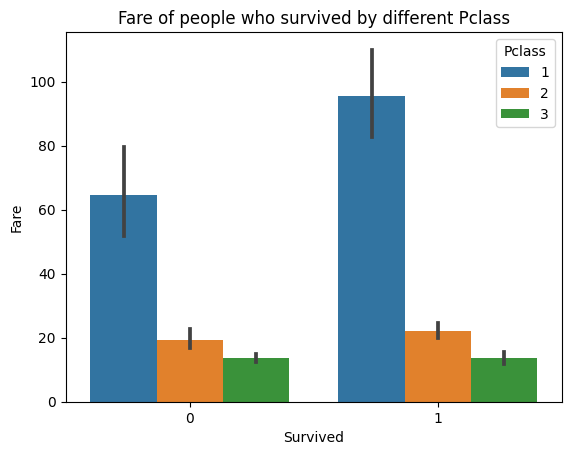

In [31]:
sns.barplot(data=train, x='Survived',y='Fare', hue='Pclass')
plt.title('Fare of people who survived by different Pclass')

Dropping unnecessary data

In [32]:
titanic = titanic.drop(columns = ['Name','Ticket'], axis=1)
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.000000,1,0,2.110213,S
1,2,1.0,1,female,38.000000,1,0,4.280593,C
2,3,1.0,3,female,26.000000,0,0,2.188856,S
3,4,1.0,1,female,35.000000,1,0,3.990834,S
4,5,0.0,3,male,35.000000,0,0,2.202765,S
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,29.881138,0,0,2.202765,S
1305,1306,NaN,1,female,39.000000,0,0,4.699571,C
1306,1307,NaN,3,male,38.500000,0,0,2.110213,S
1307,1308,NaN,3,male,29.881138,0,0,2.202765,S


Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex','Embarked']
le = LabelEncoder()

for col in cols:
    titanic[col] = le.fit_transform(titanic[col])

titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.000000,1,0,2.110213,2
1,2,1.0,1,0,38.000000,1,0,4.280593,0
2,3,1.0,3,0,26.000000,0,0,2.188856,2
3,4,1.0,1,0,35.000000,1,0,3.990834,2
4,5,0.0,3,1,35.000000,0,0,2.202765,2
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,1,29.881138,0,0,2.202765,2
1305,1306,NaN,1,0,39.000000,0,0,4.699571,0
1306,1307,NaN,3,1,38.500000,0,0,2.110213,2
1307,1308,NaN,3,1,29.881138,0,0,2.202765,2


Train-Test Split

In [34]:
train_len = len(train)
test_len = len(test)


# syntax :- iloc[starting row : ending row, starting column : ending column]

train = titanic.iloc[:train_len, :]
test = titanic.iloc[train_len:, :]
titanic.iloc

In [35]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.000000,1,0,2.110213,2
1,2,1.0,1,0,38.000000,1,0,4.280593,0
2,3,1.0,3,0,26.000000,0,0,2.188856,2
3,4,1.0,1,0,35.000000,1,0,3.990834,2
4,5,0.0,3,1,35.000000,0,0,2.202765,2
...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,1,27.000000,0,0,2.639057,2
887,888,1.0,1,0,19.000000,0,0,3.433987,2
888,889,0.0,3,0,29.881138,1,2,3.196630,2
889,890,1.0,1,1,26.000000,0,0,3.433987,0


In [36]:
test

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.500000,0,0,2.178064,1
892,893,NaN,3,0,47.000000,1,0,2.079442,2
893,894,NaN,2,1,62.000000,0,0,2.369075,1
894,895,NaN,3,1,27.000000,0,0,2.268252,2
895,896,NaN,3,0,22.000000,1,1,2.586824,2
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,1,29.881138,0,0,2.202765,2
1305,1306,NaN,1,0,39.000000,0,0,4.699571,0
1306,1307,NaN,3,1,38.500000,0,0,2.110213,2
1307,1308,NaN,3,1,29.881138,0,0,2.202765,2


In [37]:
#input split

x = train.drop(columns=['PassengerId','Survived'],axis = 1)
y = train['Survived']

#check the input attributes we gonna use for testing
x.head()
#y.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


Model Training

In [38]:
#import the model
from sklearn.model_selection import train_test_split, cross_val_score

In [39]:
def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state= 4)
    model.fit(x_train, y_train)
    print('Accuracy: ',model.score(x_test, y_test))
    
    score = cross_val_score(model,x,y)
    print(score)
    print('Cross Validation Score: ', np.mean(score))

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy:  0.8161434977578476
[0.77653631 0.78089888 0.76966292 0.76966292 0.82022472]
Cross Validation Score:  0.7833971502102819


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,x,y)

Accuracy:  0.8161434977578476
[0.74301676 0.75280899 0.79775281 0.74719101 0.83146067]
Cross Validation Score:  0.7744460485845208


In [42]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,x,y)

Accuracy:  0.8116591928251121
[0.79888268 0.80898876 0.85393258 0.79213483 0.84269663]
Cross Validation Score:  0.819327098110602


Complete Model Training with full data

In [43]:
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [44]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [45]:
x_test = test.drop(columns=['PassengerId','Survived'],axis = 1)
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.500000,0,0,2.178064,1
892,3,0,47.000000,1,0,2.079442,2
893,2,1,62.000000,0,0,2.369075,1
894,3,1,27.000000,0,0,2.268252,2
895,3,0,22.000000,1,1,2.586824,2
...,...,...,...,...,...,...,...
1304,3,1,29.881138,0,0,2.202765,2
1305,1,0,39.000000,0,0,4.699571,0
1306,3,1,38.500000,0,0,2.110213,2
1307,3,1,29.881138,0,0,2.202765,2


In [46]:
#show prediction results

pred = model.predict(x_test)
pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

Test Submission

In [48]:
#importing the submission template file
sub = pd.read_csv('C:/Users/HP/Desktop/gender_submission.csv')
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [49]:
#Replacing the Survived column of submission template with the survived data we predicted

sub['Survived'] = pred
sub

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [50]:
#exporting the results to a csv file to be submitted.

sub.to_csv('predict result.csv', index = False)